<img src="photo1.jpg" align="center"/>

This project is <font color='green'>focused on predicting the salaries on the realm of data science based</font> on **experience level**, **company_size**, **employment type**, and **geography**. Through advanced algorithms and a diverse dataset, we aim to uncover the key factors influencing data scientists' compensation.

<img src="photo 2.jpg" align="center"/>

### Domain Knowledge

**work_year [categorical]**: The "Year" attribute in our dataset represents the specific year in which the salary was disbursed, taking into account the potential impact of different economic conditions on the salary levels of data scientists.

**experience_level [categorical]**: The level of experience a person holds in a job, impacting salary calculation, as more experienced individuals typically receive higher pay due to advanced skills and knowledge.

**employment_type [categorical]**: The nature of the employment contract, such as full-time, part-time, or contractual, significantly influencing the salary, with full-time employees often receiving higher annual pay compared to part-time or contractual counterparts.

**job_title [categorical]**: The role an individual holds within a company, with different roles having varying salary scales based on responsibilities and required skills (e.g., managerial roles typically have higher pay than entry-level positions).

**salary [numerical]**: The total gross salary paid to the individual, directly influenced by factors like experience level, job title, and employment type.

**salary_currency [categorical]**: The specific currency in which the salary is paid, denoted by an ISO 4217 code, taking into account exchange rates that could affect the salary value when converted into different currencies.

**salaryinusd [numerical]**: The total gross salary amount converted to US dollars, allowing for a uniform comparison of salaries across different countries and currencies.

**employee_residence [categorical]**: The primary country of residence of the employee, denoted by an ISO 3166 code, impacting salary levels due to cost of living and prevailing wage rates in the country.

**remote_ratio [ratio]**: The proportion of work done remotely, where companies may adjust salaries based on the cost of living in the employee's location and the extent of remote work.

**company_location [categorical]**: The location of the employer's main office or branch holding the contract, with companies in different locations offering different salary scales due to varying economic conditions and cost of living.

**company_size [categorical]**: The median number of employees in the company during the work year, with larger companies often having structured salary scales and offering higher salaries due to economies of scale and larger revenue streams.

**💸💸💸These attributes, with the right statistical and machine learning techniques can give us a model to predict someone's salary💸💸💸**

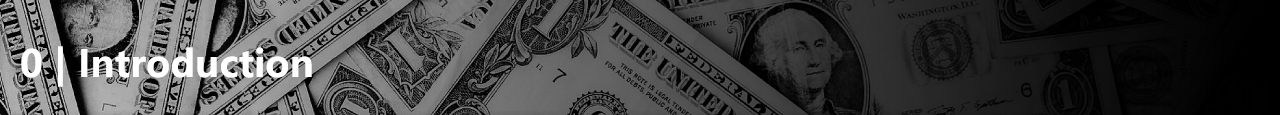

**I <font color='green'>|</font> Preface**

Logistic Regression, RandomForest, Naive Bayes, Support Vector Machines, and Gradient Boosting Classifier are utilized in analyzing this type of data. These models are known for their distintc strenths when dealing with diverse data types and structure.

The criterias for selecting these models are as follows:

1. Able to Handle Both Data Types: All models - Logistic Regression, RandomForest, Naive Bayes, Support Vector Machines, and Gradient Boosting Classifier - possess the ability to effectively handle a wide range of data types in our dataset, encompassing both numerical and categorical variables. This adaptability is especially advantageous due to the diversity of features present, such as work year, experience level, employment type, job title, salary, salary currency, salary in USD, employee residence, remote ratio, company location, and company size.

2. Generalization:  RandomForest, Support Vector Machines, and Gradient Boosting Classifier are machine learning models which excels on generalizing new, and unseen data. Both RandomForest , and Gradient Boosting Classifier utilizes an ensemble learning technique that combines multiple weak learners (typically decision trees). By sequentially adding trees to correct the errors made by the previous ones, it creates a robust and generalized model. While Support Vector Machine uses margin maximation which aims to find a hyperplane that maximizes the margin between different classes. This focus on maximizing the margin can lead to better generalization and reduced overfitting.

3. Handling Non-Linearity: Dataset can contain a complex and non-linear relationships. It is important to include models that handles and capture intricate relationships between feature and target variable. RandomForest, Support Vector Machines, and Gradient Boosting Classifier are models selected for this type of data.

4. Effective with Large Dataset: With the given dataset it is crucial to include machine learning models that are capable of efficiently handling large data set. Naive Bayes, Logistic Regression, RandomForest, and Gradient Boosting Classifier were selected for this.

5. Efficient with High-Dimension Data: Support Vector Machines, Gradient Boosting Classifier, and RandomForest are models that are able to handle high-dimension data efficiently.

**II <font color='green'>|</font> Import Libraries**

In [782]:
import warnings
warnings.filterwarnings('ignore')

# Import essentials
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Import Sci-kit for Machine Learning Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Import Statistics libraries
from scipy import stats
from scipy.stats import norm

# Import country code libraries
import pycountry

#Install plot library
import plotly.io as pio
#pio.renderers.default='notebook'

**III <font color='green'>|</font> Input Dataset**

In [783]:
df = pd.read_csv('ds_salaries.csv')

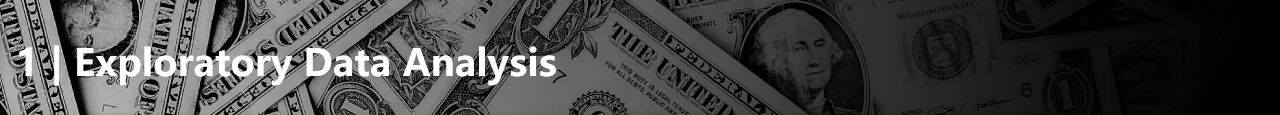

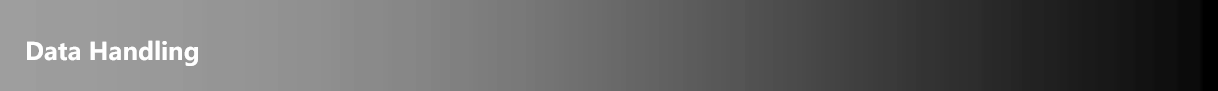

**I <font color='green'>|</font> Check for Number of Uniques**

In [784]:
# Check uniques in a row
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

**II <font color='green'>|</font> Check for Number of Null**

In [785]:
# Check for missing data in a row
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**III <font color='green'>|</font> Check for Duplicates on a Column**

In [786]:
# Check for duplicated data in a column
df_transposed = df.transpose()
duplicates = df_transposed.index[df_transposed.duplicated()].nunique()
duplicates

0

**IV <font color='green'>|</font> Explore the Data**

In [787]:
# Show the head
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


**V <font color='green'>|</font> Renaming Data**

In [788]:
df.experience_level = df.experience_level.replace({'EN': 'Entry Level',
                                                   'MI': 'Mid/Intermediate Level',
                                                   'SE': 'Senior Level',
                                                   'EX': 'Executive Level'})

df.employment_type = df.employment_type.replace({'FL': 'Freelancer',
                                                 'CT': 'Contractor',
                                                 'PT': 'Part-time',
                                                 'FT': 'Full-time'})

df.company_size = df.company_size.replace({'S': 'SMALL',
                                           'M': 'MEDIUM',
                                           'L': 'LARGE'})

df.remote_ratio = df.remote_ratio.astype(str)
df.remote_ratio = df.remote_ratio.replace({'0': 'On-Site',
                                           '50': 'Half-Remote',
                                           '100' : 'Full-Remote'}) 

**VI <font color='green'>|</font> Group the Job Title**

In [789]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

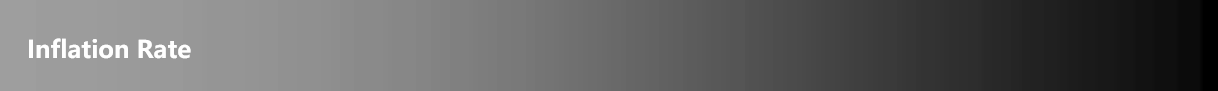

**VII <font color='green'>|</font> Adjust Salaries to Present Value**

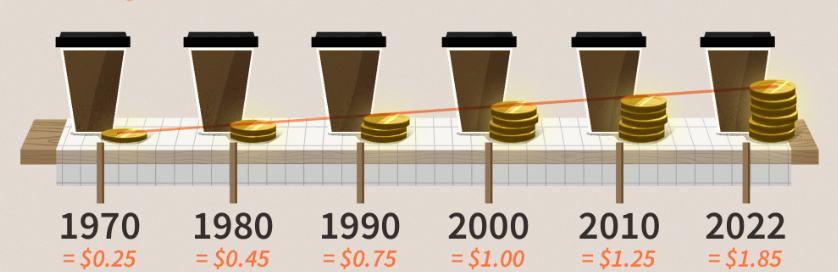

Various currencies are observed on the salaries with different year. To accurately analyze and compare these salaries we need to convert the salaries into a uniform currency and take into account the inflation to adjust the value of salary to its current value. Adjusting and converting salaries to a specific currency and year, we can make an accurate comparison to analyze its relation to other features.

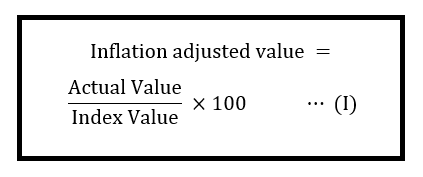

| Explanation:


Define inflation rates for the United States (US) and global markets. These rates will be used to adjust the salaries based on the year and currency.

Create a function adjust_salary() that takes a row from the dataset as input and calculates the adjusted salary based on the work year, original salary, and currency. If the work year is 2023, the salary does not need to be adjusted, and the original salary is returned.

Determine the number of years between the work year and 2023 . Use the appropriate inflation rate based on the currency, either the US or global inflation rate.

Calculate the adjusted salary by applying the inflation rate to the original salary for each year from the work year to 2023.

Apply the adjust_salary() function to the dataset using the apply() method, and create a new column 'adjusted_salary' with the adjusted salary values.

In [790]:
# Inflation rates
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
    year = row.work_year
    original_salary = row.salary_in_usd
    currency = row.salary_currency

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

# Apply the function to the dataset
df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

#------------
#credit : @rrrrrrita
#------------

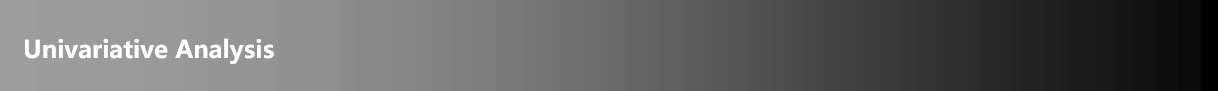

**VIII <font color='green'>|</font> Job Distribution**

Text(0.5, 1.0, 'Job Titles Percentage')

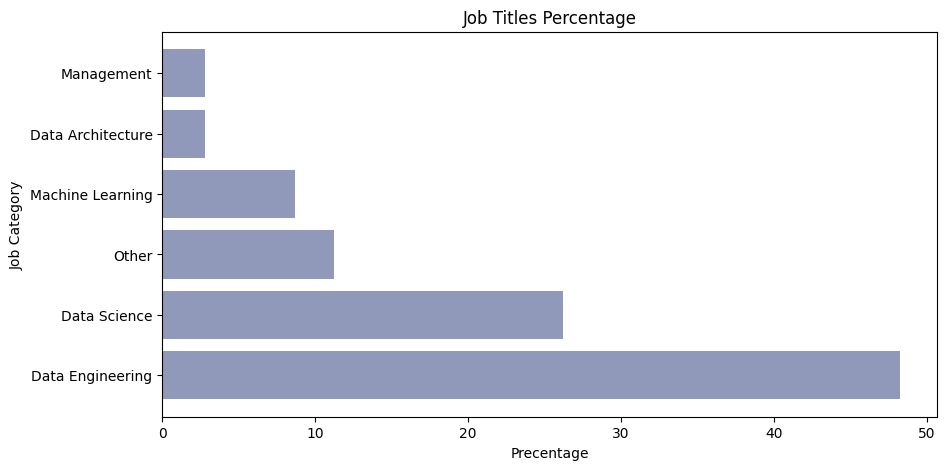

In [791]:
value_counts = df.job_category.value_counts(normalize=True) *100
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(value_counts.index[:], value_counts.values[:], color='#9099BA' , align='center')
ax.set_xlabel('Precentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')

| Explanation:

Roles in Data Engineering makes up almost half of the total jobs on the data with management makes up the least.

**IX <font color='green'>|</font> Salary Distribution**

Text(0, 0.5, 'Adjusted Salary')

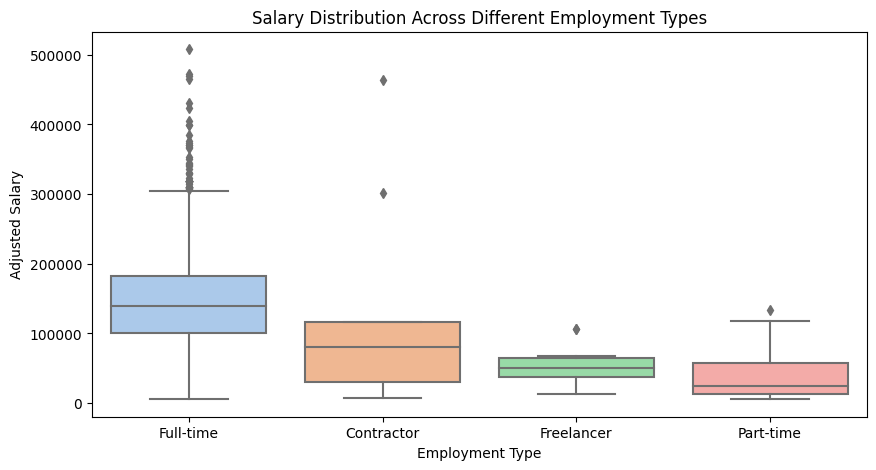

In [792]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='employment_type', y='adjusted_salary', palette='pastel')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')

| Explanation:

Full-time job earns the most with the majority earns 100k-200k.

**X <font color='green'>|</font> Distribution of Salary**

Adjusted Salary Mu: 142445.65920779307, Sigma: 64692.97536803713
Adjusted Salary Skewness: 0.5766891651013609, Sigma: 1.13584749981765


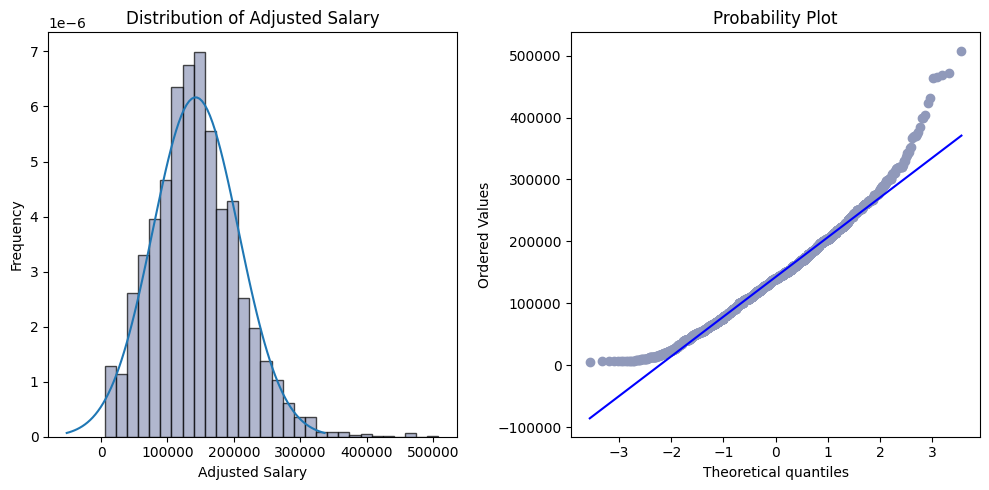

In [793]:
 # Plot the distribution of the data

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.hist(df.adjusted_salary, bins=30, density=True, alpha=0.7, color='#9099BA', edgecolor='black')

# Fit a normal distribution to the data
(mu, sigma) = stats.norm.fit(df.adjusted_salary)
print(f'Adjusted Salary Mu: {mu}, Sigma: {sigma}')

# Calculate the skewness and kurtosis of the data
print(f'Adjusted Salary Skewness: {df.adjusted_salary.skew()}, Sigma: {df.adjusted_salary.kurt()}')

# Add the fitted normal distribution to the plot
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax1.plot(x, y, label='Normal fit')

#Add labels and title to the plot
ax1.set_xlabel('Adjusted Salary')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Adjusted Salary')

# Plot the QQ-plot
stats.probplot(df.adjusted_salary, plot=ax2)
ax2.get_lines()[0].set_color('#9099BA')
ax2.get_lines()[1].set_color('b')

plt.tight_layout()       
plt.show()
    

**XI <font color='green'>|</font> Boxplot and Swarmplot of Adjusted Salary**

In [794]:
#formatted_data = df.loc[:, 'adjusted_salary'].describe().apply(lambda x: f'{x:.2f}')
#
#plt.figure(figsize=(10,5))
#sns.swarmplot(x=df.adjusted_salary, palette='pastel', zorder=.5, size=2.5)
#sns.boxplot(x=df.adjusted_salary, palette='coolwarm', boxprops=dict(alpha=.5))
#plt.ylabel('Adjusted Salary')
#plt.title('Boxplot and Swarmplot of Adjusted Salary')
#
#formatted_data

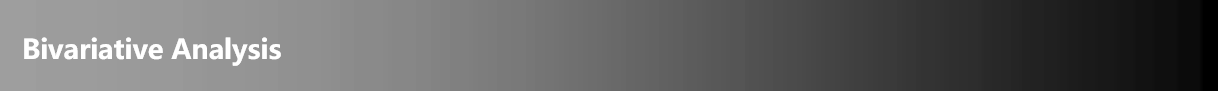

**XII <font color='green'>|</font> Median Salary by Job Title**

Text(0.5, 1.0, 'Median Salary by Year')

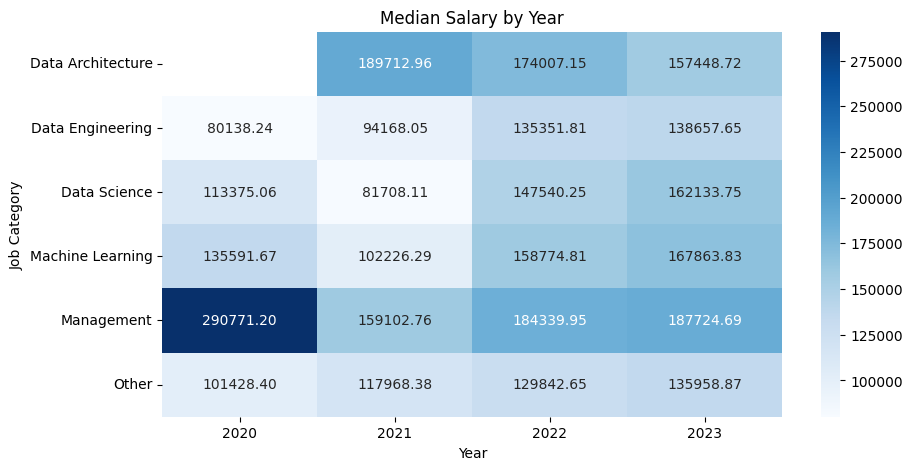

In [795]:
pivot_table = df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='mean')
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, fmt='.2f', annot=True, cmap='Blues')
plt.xlabel('Year')
plt.ylabel('Job Category')
plt.title('Median Salary by Year')

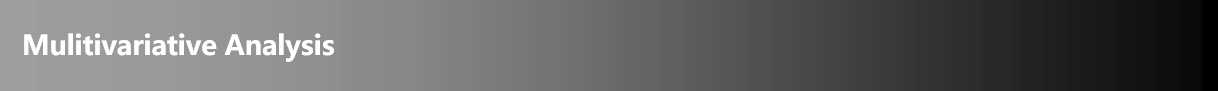

**XIII <font color='green'>|</font> Salary Comparison Betweeon Residence and Company Location**

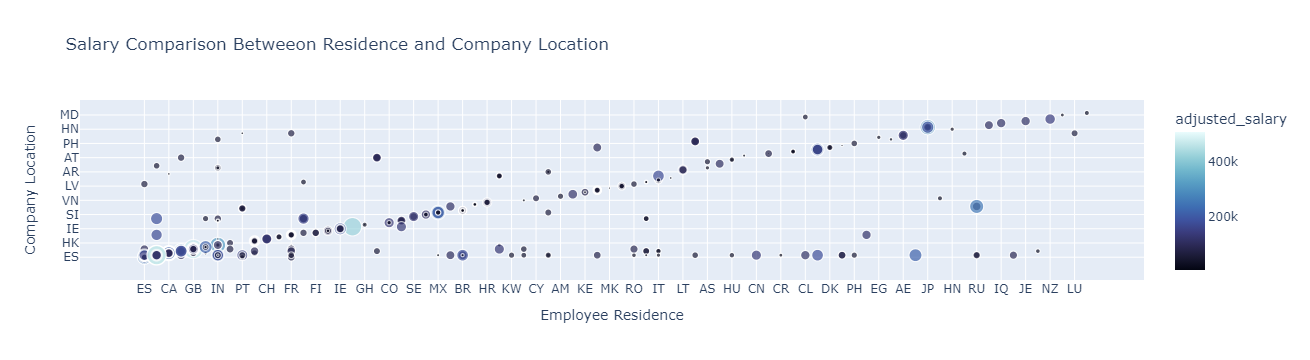

In [796]:

df.adjusted_salary = df.adjusted_salary.astype(float).round(2)
fig = px.scatter(data_frame=df, x='employee_residence', y='company_location', color='adjusted_salary', size='adjusted_salary', color_continuous_scale='ice',
                labels={'company_location': 'Company Location',
                        'employee_residence': 'Employee Residence'},
                title='Salary Comparison Betweeon Residence and Company Location')


fig.show()

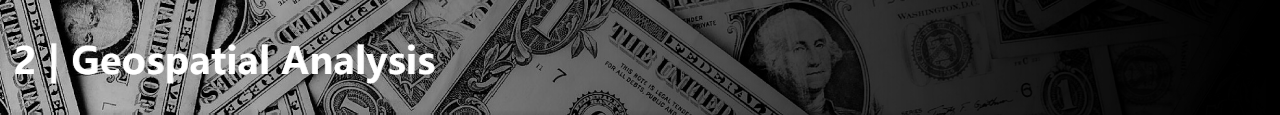

**I <font color='green'>|</font> Convert Country Code to Country Name**

In [797]:
# Function to convert ISO 3166 country code to country name
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
    # Function to convert country code to full name
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

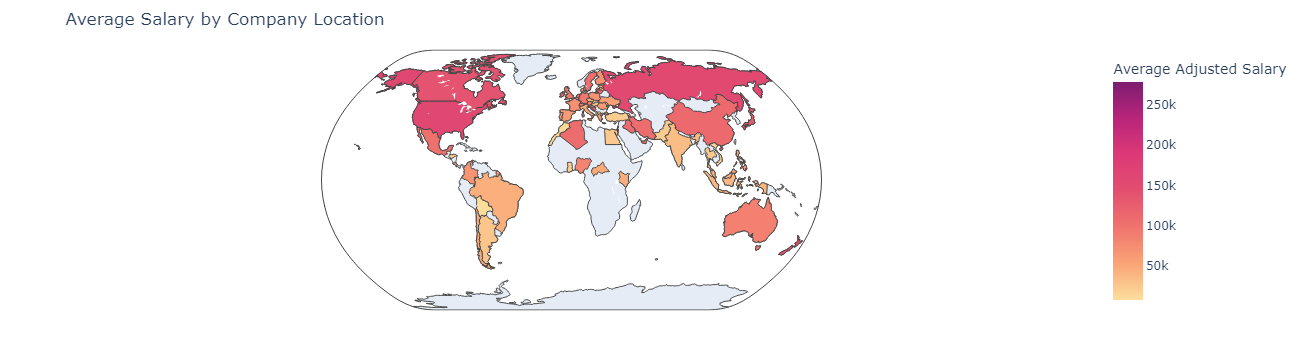

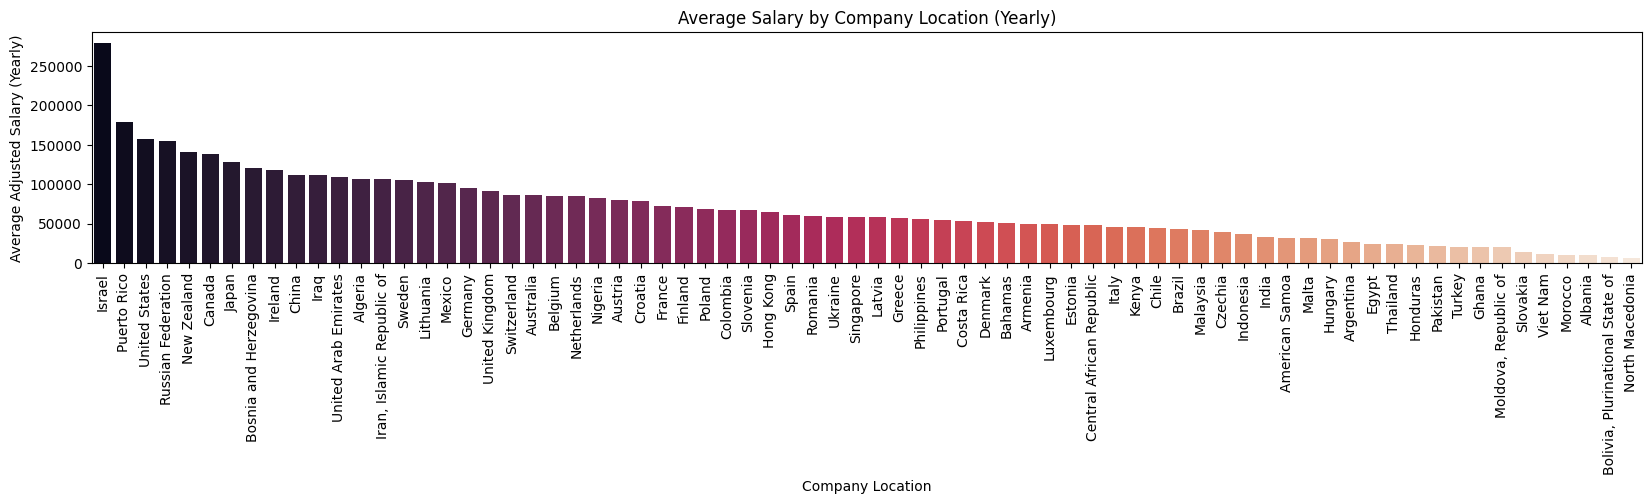

In [798]:
df.company_location = df.company_location.apply(country_code_to_name)
df.employee_residence = df.employee_residence.apply(country_code_to_name)

average_salary_by_location = df.groupby('company_location', as_index=False)['adjusted_salary'].mean()

fig1 = px.choropleth(average_salary_by_location, 
                     locations='company_location', 
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='company_location',
                     color_continuous_scale='sunsetdark',
                     title='Average Salary by Company Location',
                     labels={'adjusted_salary': 'Average Adjusted Salary'},
                     projection='natural earth')
fig1.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig1.show()

# Average salary by company_location
avg_salary_by_location = df.groupby('company_location')['adjusted_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 3))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location, palette='rocket')
plt.title('Average Salary by Company Location (Yearly)')
plt.xlabel('Company Location')
plt.ylabel('Average Adjusted Salary (Yearly)')
plt.xticks(rotation=90)
plt.show()


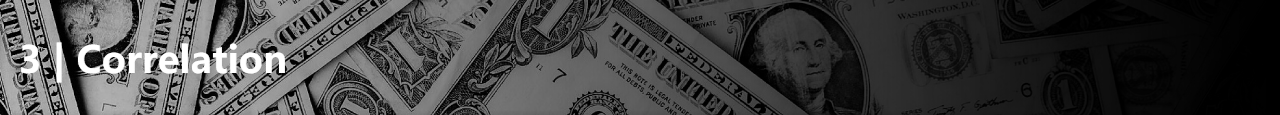

**I <font color='green'>|</font> Selecting Numerical and Categorical Data**

In [799]:
# Select comlumns by data type
num_cols = make_column_selector(dtype_include='number')
con_cols = make_column_selector(dtype_exclude='number')

In [800]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior Level,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Full-Remote,Spain,LARGE,Other,85847.0
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,United States,Full-Remote,United States,SMALL,Machine Learning,30000.0
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,United States,Full-Remote,United States,SMALL,Machine Learning,25500.0
3,2023,Senior Level,Full-time,Data Scientist,175000,USD,175000,Canada,Full-Remote,Canada,MEDIUM,Data Science,175000.0
4,2023,Senior Level,Full-time,Data Scientist,120000,USD,120000,Canada,Full-Remote,Canada,MEDIUM,Data Science,120000.0


In [801]:
df.drop(['salary_currency','salary_in_usd', 'adjusted_salary', 'salary'], axis=1, inplace=True)

In [802]:
# Define the X and y
X = df.iloc[:, :8]
y = df.iloc[:, -1]

**I <font color='green'>|</font> Preprocessing and Scaling Data**

Before training the model, preprocessing plays a vital role. For numerical features, a key step involves standardization, which entails removing the mean and scaling them to have a unit variance. As for categorical features, they are subjected to one-hot encoding, a necessary process to ensure proper understanding by the machine learning model. Although standardization may not be mandatory for all models, it is generally considered good practice to employ it.

StandardScaler() is a preprocessing class in the scikit-learn library, which is widely used in machine learning tasks. It is part of the sklearn.preprocessing module and is designed to standardize numerical features in your dataset. Standardization, also known as z-score normalization, is a common preprocessing technique used to rescale the features of a dataset so that they have a mean of 0 and a standard deviation of 1.

The formula for standardization of a feature x is given by:

<img src="StandardScaler.png" align="center"/>

where:

'x' is an individual data point of the feature.

μ'mean' is the mean of the feature across the dataset.

σ 'standard deviatio'n is the standard deviation of the feature across the dataset.

By applying the StandardScaler() to your numerical features, you effectively transform the dataset into a standardized scale, which can be beneficial for many machine learning algorithms. Some algorithms, such as gradient descent-based methods, converge faster when the features are scaled.

In [804]:
Imp_num = SimpleImputer(strategy='constant', add_indicator=True)
scaler = StandardScaler()

Imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

# do all preprocessing
preprocessor = make_column_transformer((make_pipeline(Imp_median, scaler), num_cols),
                                       (make_pipeline(Imp_constant, ohe), con_cols))
preprocessor.fit(X, y)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001A621A2E1C0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001A621A2E250>)])

In [ ]:
preprocessor.corr

In [ ]:
# Calculate quantiles for salary bin edges
quantiles = [0, 1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1]
bin_edges = [df['adjusted_salary'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['low', 'low-mid', 'mid', 'mid-high', 'high', 'very-high', 'Top']
df['salary_range'] = pd.cut(df['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

**I <font color='green'>|</font> Selecting Numerical and Categorical Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=99)

In [ ]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(), 
    ('Support Vector Machines',)]

# Model training, evaluation, and selection
best_model = None
best_score = -np.inf

print("Model performance:")
for name, model in models:
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    #cross validate the pipeline
    crosss_validation = cross_val_score(pipe, X, y).mean()
    
    print(f"{name} - Accuracy: {accuracy:.2f} - Cross Validation: {crosss_validation}")
    
    if accuracy > best_score:
        best_score = accuracy
        best_model = name

print(f"Best model: {best_model} with accuracy: {best_score:.2f}, and Cross Validation: {crosss_validation}")